In [1]:
import wobble
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.python.client import timeline

options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
run_metadata = tf.RunMetadata()

In [2]:
data = wobble.Data('../data/51peg_e2ds.hdf5', orders=[30, 56])

In [3]:
results = wobble.Results(data=data)

In [6]:
#for r in range(data.R):
    r = 0 # single order
    model = wobble.Model(data, results, r)
    model.add_star('star')
    model.add_telluric('tellurics')
    wobble.optimize_order(model, niter=0, save_history=False, rv_uncertainties=False,
                                  template_uncertainties=False, options=options, 
                                  run_metadata=run_metadata)

0it [00:00, ?it/s]

optimize: iterating through 0 optimization steps...


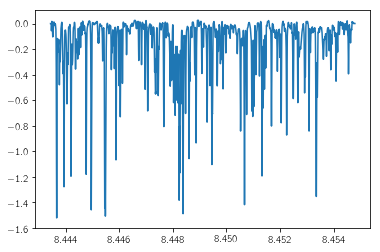

In [7]:
plt.plot(results.star_template_xs[r], results.star_template_ys[r])

In [8]:
from wobble.interp import interp

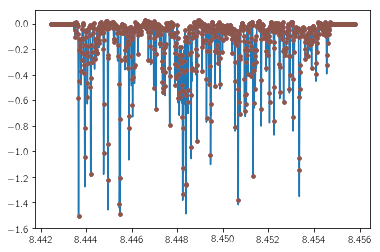

In [16]:
x, y = results.star_template_xs[r], results.star_template_ys[r]
t = np.linspace(x.min()-0.001, x.max()+0.001, 1000)
t = t[:, None] + np.zeros((len(t), 5))
res = interp(t, x, y)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    v = sess.run(res)
    
plt.plot(x, y)
plt.plot(t, v, ".")

In [18]:
np.any(np.isnan(v))

False

In [7]:
fetched_timeline = timeline.Timeline(run_metadata.step_stats)
chrome_trace = fetched_timeline.generate_chrome_trace_format()
with open('timeline06.json', 'w') as f:
    f.write(chrome_trace)

In [5]:
r = 0
model = wobble.Model(data, results, r)

In [6]:
model.add_star('star')
model.add_telluric('tellurics')

In [8]:
A = model.components[0].epoch_mask
A[0] = 0
ss = data.xs[0]

In [9]:
np.shape(A[:,None] * ss)

(91, 4096)

In [10]:
A[:,None] * ss

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [8.44351333, 8.44351659, 8.44351974, ..., 8.45469301, 8.4546953 ,
        8.45469758],
       [8.44351343, 8.44351659, 8.44351985, ..., 8.4546929 , 8.45469519,
        8.45469748],
       ...,
       [8.44351333, 8.44351659, 8.44351974, ..., 8.45469301, 8.4546953 ,
        8.45469758],
       [8.44351333, 8.44351659, 8.44351974, ..., 8.45469301, 8.4546953 ,
        8.45469758],
       [8.44351333, 8.44351659, 8.44351974, ..., 8.45469301, 8.4546953 ,
        8.45469758]])